##### TD4 Analyser des données dans le cadre d'un modèle statistique


######                        MARCEL MOREL ADJALLA

**1/  Chargement et Préparation des données**

1.1 Lecture des données

In [1]:
!pip install numpy


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np 

In [4]:
geometries = pd.read_csv('./data/Rouet_geometries.csv', encoding='latin', decimal=',', sep=';', skiprows=2)

In [5]:
geometries = geometries.iloc[:-1, :]

In [6]:
geometries = geometries.replace(',', '.', regex=True)

In [7]:
geometries

,N° Pale,BA in,MI in,BF intra,BA ex,MI Ex,BF ex,BA in.1,MI in.1,BF intra.1,...,85,86,87,88,89,90,91,92,93,94
0,1.0,0.077,0.064,0.047,0.054,0.035,0.053,4.43,2.03,1.95,...,121.0,151.0,140.0,143.0,161.0,168.0,180.0,175.0,182.0,194.0
1,2.0,0.068,0.073,0.059,0.056,0.039,0.053,4.44,2.02,1.95,...,129.0,155.0,149.0,148.0,172.0,176.0,187.0,185.0,190.0,197.0
2,3.0,0.074,0.072,0.055,0.059,0.038,0.047,4.44,2.03,1.95,...,129.0,154.0,146.0,146.0,165.0,173.0,183.0,177.0,185.0,195.0
3,4.0,0.070,0.076,0.058,0.056,0.037,0.062,4.46,2.02,1.94,...,125.0,152.0,146.0,146.0,168.0,171.0,186.0,182.0,189.0,196.0
4,5.0,0.086,0.060,0.041,0.042,0.043,0.065,4.42,2.03,1.97,...,126.0,150.0,147.0,146.0,164.0,172.0,185.0,178.0,184.0,194.0
5,6.0,0.066,0.066,0.046,0.048,0.047,0.063,4.47,2.02,1.96,...,116.0,145.0,139.0,135.0,153.0,168.0,177.0,164.0,170.0,185.0
6,7.0,0.079,0.059,0.050,0.049,0.048,0.050,4.46,2.04,1.95,...,121.0,148.0,140.0,142.0,158.0,172.0,183.0,171.0,175.0,191.0
7,8.0,0.076,0.075,0.056,0.053,0.042,0.051,4.43,2.01,1.94,...,132.0,160.0,153.0,151.0,174.0,181.0,191.0,185.0,192.0,200.0
8,9.0,0.080,0.066,0.058,0.046,0.050,0.053,4.42,2.02,1.95,...,132.0,164.0,157.0,159.0,182.0,186.0,195.0,194.0,201.0,202.0
9,10.0,0.086,0.062,0.054,0.049,0.047,0.070,4.42,2.02,1.94,...,157.0,187.0,183.0,181.0,201.0,211.0,220.0,210.0,214.0,229.0


In [8]:
geometries.columns

Index(['N° Pale', 'BA in', 'MI in', 'BF intra', 'BA ex', 'MI Ex', 'BF ex',
       'BA in.1', 'MI in.1', 'BF intra.1',
       ...
       '85', '86', '87', '88', '89', '90', '91', '92', '93', '94'],
      dtype='object', length=112)

In [16]:
pd.set_option('display.max_rows', None)
print(geometries.dtypes)


N° Pale       float64
BA in         float64
MI in         float64
BF intra      float64
BA ex         float64
MI Ex         float64
BF ex         float64
BA in.1       float64
MI in.1       float64
BF intra.1    float64
BA ex.1       float64
MI Ex.1       float64
BF ex.1       float64
BF             object
BA            float64
BF.1          float64
BA.1          float64
BF.2          float64
1             float64
2             float64
3             float64
4             float64
5             float64
6             float64
7             float64
8             float64
9             float64
10            float64
11            float64
12            float64
13            float64
14            float64
15            float64
16            float64
17            float64
18            float64
19            float64
20            float64
21            float64
22            float64
23            float64
24            float64
25            float64
26            float64
27            float64
28        

In [9]:
geometries.shape

(13, 112)

In [10]:
vibrations = pd.read_csv('./data/Rouet_vibrations.csv', encoding='latin',decimal=',', sep=';', skiprows=1)

In [11]:
vibrations.head()
#vibrations.shape

,N° Pale,Niveau vibratoire 1FPP (mm),Vitesse de rotation - Régime (RPM)
0,1,0.54,16532.3
1,2,0.60,16538.4
2,3,0.61,16543.6
3,4,0.53,16560.2
4,5,0.43,16550.8


1.2 Standardisez les variables géométriques afin d'obtenir des variables centrées (moyenne 0) et réduites (variance 1)

copions geometries dans X1 par précaution 

In [12]:
geometries

,N° Pale,BA in,MI in,BF intra,BA ex,MI Ex,BF ex,BA in.1,MI in.1,BF intra.1,...,85,86,87,88,89,90,91,92,93,94
0,1.0,0.077,0.064,0.047,0.054,0.035,0.053,4.43,2.03,1.95,...,121.0,151.0,140.0,143.0,161.0,168.0,180.0,175.0,182.0,194.0
1,2.0,0.068,0.073,0.059,0.056,0.039,0.053,4.44,2.02,1.95,...,129.0,155.0,149.0,148.0,172.0,176.0,187.0,185.0,190.0,197.0
2,3.0,0.074,0.072,0.055,0.059,0.038,0.047,4.44,2.03,1.95,...,129.0,154.0,146.0,146.0,165.0,173.0,183.0,177.0,185.0,195.0
3,4.0,0.070,0.076,0.058,0.056,0.037,0.062,4.46,2.02,1.94,...,125.0,152.0,146.0,146.0,168.0,171.0,186.0,182.0,189.0,196.0
4,5.0,0.086,0.060,0.041,0.042,0.043,0.065,4.42,2.03,1.97,...,126.0,150.0,147.0,146.0,164.0,172.0,185.0,178.0,184.0,194.0
5,6.0,0.066,0.066,0.046,0.048,0.047,0.063,4.47,2.02,1.96,...,116.0,145.0,139.0,135.0,153.0,168.0,177.0,164.0,170.0,185.0
6,7.0,0.079,0.059,0.050,0.049,0.048,0.050,4.46,2.04,1.95,...,121.0,148.0,140.0,142.0,158.0,172.0,183.0,171.0,175.0,191.0
7,8.0,0.076,0.075,0.056,0.053,0.042,0.051,4.43,2.01,1.94,...,132.0,160.0,153.0,151.0,174.0,181.0,191.0,185.0,192.0,200.0
8,9.0,0.080,0.066,0.058,0.046,0.050,0.053,4.42,2.02,1.95,...,132.0,164.0,157.0,159.0,182.0,186.0,195.0,194.0,201.0,202.0
9,10.0,0.086,0.062,0.054,0.049,0.047,0.070,4.42,2.02,1.94,...,157.0,187.0,183.0,181.0,201.0,211.0,220.0,210.0,214.0,229.0


In [13]:
X1 = geometries.drop(columns=['N° Pale'], errors='ignore').copy()


In [14]:
X1.head()

,BA in,MI in,BF intra,BA ex,MI Ex,BF ex,BA in.1,MI in.1,BF intra.1,BA ex.1,...,85,86,87,88,89,90,91,92,93,94
0,0.077,0.064,0.047,0.054,0.035,0.053,4.43,2.03,1.95,4.60,...,121.0,151.0,140.0,143.0,161.0,168.0,180.0,175.0,182.0,194.0
1,0.068,0.073,0.059,0.056,0.039,0.053,4.44,2.02,1.95,4.59,...,129.0,155.0,149.0,148.0,172.0,176.0,187.0,185.0,190.0,197.0
2,0.074,0.072,0.055,0.059,0.038,0.047,4.44,2.03,1.95,4.59,...,129.0,154.0,146.0,146.0,165.0,173.0,183.0,177.0,185.0,195.0
3,0.070,0.076,0.058,0.056,0.037,0.062,4.46,2.02,1.94,4.56,...,125.0,152.0,146.0,146.0,168.0,171.0,186.0,182.0,189.0,196.0
4,0.086,0.060,0.041,0.042,0.043,0.065,4.42,2.03,1.97,4.61,...,126.0,150.0,147.0,146.0,164.0,172.0,185.0,178.0,184.0,194.0


In [15]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [16]:
from sklearn.preprocessing import StandardScaler

X1_scaled = StandardScaler().fit_transform(X1)

X1_scaled

array([[-0.16766319, -0.50410083, -0.73993433, ..., -0.74174488,
        -0.67345379, -0.55903023],
       [-1.47543605,  1.13422687,  1.39765374, ...,  0.04221312,
        -0.01270668, -0.31406193],
       [-0.60358748,  0.95219046,  0.68512438, ..., -0.58495328,
        -0.42567362, -0.47737413],
       ...,
       [ 1.28541777, -0.14002801, -0.73993433, ..., -0.50655748,
        -0.5908604 , -0.55903023],
       [ 0.4135692 ,  0.22404481, -1.09619901, ...,  0.66937953,
         0.73063382,  0.82912348],
       [ 1.14010968, -1.05021006, -0.38366965, ...,  1.68852493,
         1.47397432,  1.80899669]])

**2. Analyse exploratoire des données**


2.1 Affichez le niveau vibratoire de chaque aube sur un bar plot

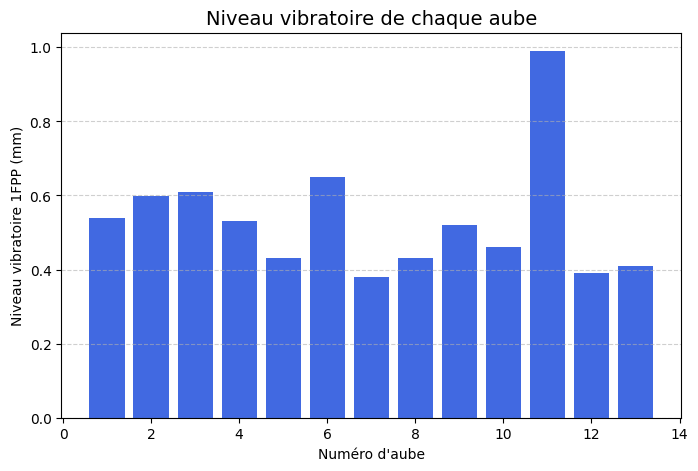

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(vibrations['N° Pale'], vibrations['Niveau vibratoire 1FPP (mm)'], color='royalblue')
plt.title("Niveau vibratoire de chaque aube", fontsize=14)
plt.xlabel("Numéro d'aube")
plt.ylabel("Niveau vibratoire 1FPP (mm)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


**2.2 Analyse par ACP de l'importance des variables géométriques**

2.2.1 Effectuez une ACP sur le jeu de données géométriques, puis calculez et visualisez la part de variance expliquée par chaque composante principale. Interprétez le résultat. Quelle part de variance est expliquée par les 2 premières CP ?

In [21]:
from sklearn.decomposition import PCA

pca = PCA()

X1_pca = pca.fit_transform(X1_scaled)


# variance expliquée  chaque composante 

explained_var = pca.explained_variance_ratio_
print("Part de variance expliquée par chaque composante :")
print(np.round(explained_var, 4))

print("\nVariance totale expliquée par les 2 premières CP :",
      round(explained_var[:2].sum()*100, 2), "%")

Part de variance expliquée par chaque composante :
[0.7926 0.0489 0.0445 0.0385 0.0212 0.0134 0.0125 0.0082 0.0074 0.006
 0.0037 0.0031 0.    ]

Variance totale expliquée par les 2 premières CP : 84.14 %


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


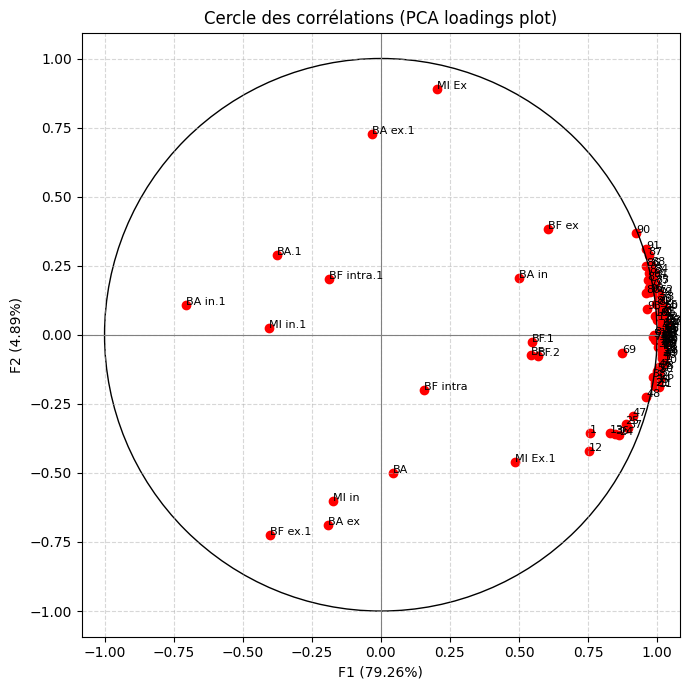

In [23]:
import matplotlib.pyplot as plt
import numpy as np

pcs = pca.components_
scaling_factors = np.sqrt(pca.explained_variance_)
F1 = pcs[0, :] * scaling_factors[0]
F2 = pcs[1, :] * scaling_factors[1]

plt.figure(figsize=(7,7))
plt.scatter(F1, F2, color='red')

for i, var in enumerate(X1.columns):
    plt.text(F1[i], F2[i], var, fontsize=8)

circle = plt.Circle((0, 0), 1, color='black', fill=False)
plt.gca().add_artist(circle)

plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)
plt.gca().set_aspect('equal', adjustable='datalim')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

plt.xlabel(f"F1 ({round(pca.explained_variance_ratio_[0]*100, 2)}%)")
plt.ylabel(f"F2 ({round(pca.explained_variance_ratio_[1]*100, 2)}%)")
plt.title("Cercle des corrélations (PCA loadings plot)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [24]:
loadings = np.abs(pca.components_)

# Pondération par la variance expliquée
weighted_loadings = loadings * pca.explained_variance_ratio_.reshape(-1, 1)

# Importance totale de chaque variable (somme sur toutes les composantes)
importance = weighted_loadings.sum(axis=0)

# Création d’un DataFrame trié
var_importance = pd.DataFrame({
    'Variable': X1.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Affichage des 10 variables les plus importantes
print(var_importance.head(10))

   Variable  Importance
41       25    0.093828
63       47    0.093814
64       48    0.093624
53       37    0.092958
54       38    0.092777
23        7    0.092666
73       57    0.092606
40       24    0.092435
97       81    0.092352
51       35    0.092276


**2.2.3 Interprétez le graphique précédent. Quelles sont les variables géométriques les plus importantes ?**

Les variables d’épaisseurs (1 à 94) sont fortement corrélées avec la composante F1, visible par leur regroupement à droite du cercle. Elles ont donc le poids le plus important sur F1, qui explique à lui seul près de 79 % de la variance. Les autres variables, moins corrélées à F1, sont liées à F2 (≈ 5 % de la variance) et traduisent des variations géométriques locales. Ainsi, F1 et F2 résument l’essentiel de la variabilité des aubes.

#### 3. Identification de l'aube anormale par analyse des corrélations

**3.1 Quel(s) coefficient(s) vous semble(nt) adapté(s) pour analyser les corrélations entre nos variables ?**

Étant donné que nous disposons d’un petit nombre d’aubes (n = 13) et que la relation entre la géométrie (PC1) et le niveau vibratoire n’est pas forcément linéaire,
les coefficients de Spearman ou de Kendall sont les plus adaptés.


En pratique, on privilégiera Spearman, car il mesure bien la corrélation monotone entre les rangs tout en restant facile à interpréter.


question 3.2

In [25]:


import math
def kendall_tau(x, y):
    """Compute Kendall's tau correlation
    
    Arguments
        xs : float array (n)
            input variable 1
        ys : float array (n)
        input variable 2
        
    Returns
        tau : float in [-1, 1]
            correlation coefficient
        pvalue : float
            p-value
    """
    assert x.size == y.size
    size = x.size
    
    tot = (size * (size-1)) // 2
    s = np.array([np.sign(x[j] - x[i]) * np.sign(y[j] - y[i]) for j in range(size) for i in range(j)])
    tau = np.sum(s) / tot
    
    dis = np.sum(s < 0)  # number of discordant pairs
    # Exact p-value, see Maurice G. Kendall, "Rank Correlation Methods" (4th Edition), Charles Griffin & Co., 1970.
    c = min(dis, tot-dis)
    if size <= 0:
        raise ValueError
    elif c < 0 or 2*c > size*(size-1):
        raise ValueError
    elif size == 1:
        pvalue = 1.0
    elif size == 2:
        pvalue = 1.0
    elif c == 0:
        pvalue = 2.0/math.factorial(size) if size < 171 else 0.0
    elif c == 1:
        pvalue = 2.0/math.factorial(size-1) if (size-1) < 171 else 0.0
    else:
        new = [0.0]*(c+1)
        new[0] = 1.0
        new[1] = 1.0
        for j in range(3,size+1):
            old = new[:]
            for k in range(1,min(j,c+1)):
                new[k] += new[k-1]
            for k in range(j,c+1):
                new[k] += new[k-1] - old[k-j]
        pvalue = 2.0*sum(new)/math.factorial(size) if size < 171 else 0.0
        
    return tau, pvalue



In [26]:
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


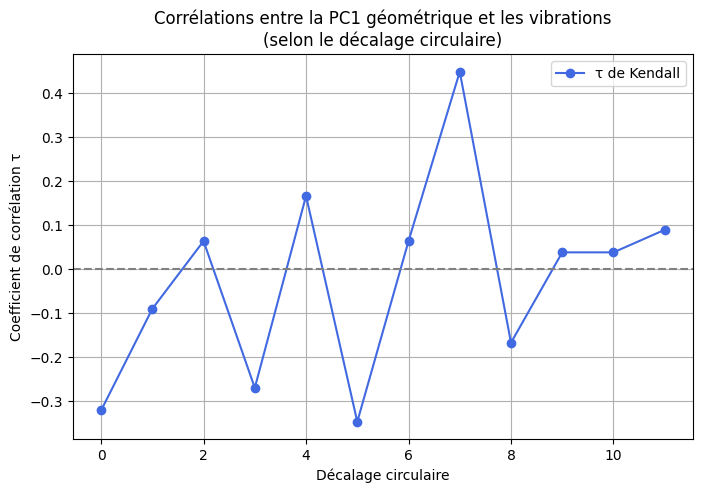

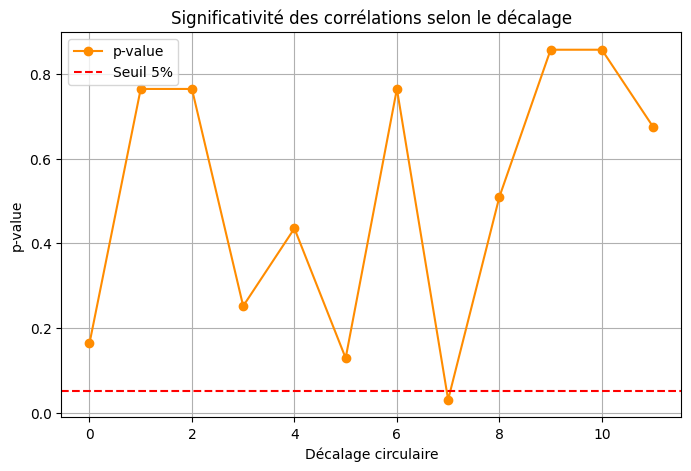

In [27]:
import numpy as np
import matplotlib.pyplot as plt


PC1 = X1_pca[:, 0]
vibration = vibrations['Niveau vibratoire 1FPP (mm)'].values

taus = []
pvals = []
shifts = range(12)  #12 décalages possibles

for k in shifts:
    vib_shifted = np.roll(vibration, k)  # décalage circulaire
    tau, pval = kendall_tau(PC1, vib_shifted)
    taus.append(tau)
    pvals.append(pval)

# Visualisation des corrélations
plt.figure(figsize=(8,5))
plt.plot(shifts, taus, marker='o', color='royalblue', label="τ de Kendall")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Décalage circulaire")
plt.ylabel("Coefficient de corrélation τ")
plt.title("Corrélations entre la PC1 géométrique et les vibrations\n(selon le décalage circulaire)")
plt.grid(True)
plt.legend()
plt.show()

# Affichage des p-values associées
plt.figure(figsize=(8,5))
plt.plot(shifts, pvals, marker='o', color='darkorange', label="p-value")
plt.axhline(0.05, color='red', linestyle='--', label="Seuil 5%")
plt.xlabel("Décalage circulaire")
plt.ylabel("p-value")
plt.title("Significativité des corrélations selon le décalage")
plt.grid(True)
plt.legend()
plt.show()


3.3 Quel est le décalage circulaire qui maximise la corrélation ? (il peut éventuellement en y avoir plusieurs) Peut-on en déduire l'aube anormale ?



#### Le décalage circulaire qui maximise la corrélation est k = 7, avec un coefficient τ ≈ 0.4 et une p-value < 0.05. Cela indique une corrélation significative entre la PC1 géométrique et les vibrations. L’aube n°8 est donc probablement l’aube anormale.

### 3.4 L'analyse de la PC1 ne s'est pas révélée suffisante, une analyse plus fine est nécessaire. Calculez, pour chaque décalage circulaire de la numérotation des aubes, les corrélations entre toutes les variables d'épaisseur (94 variables) et le niveau vibratoire. Concluez sur l'identité de l'aube défaillante, ainsi que sur la zone précise du défaut.

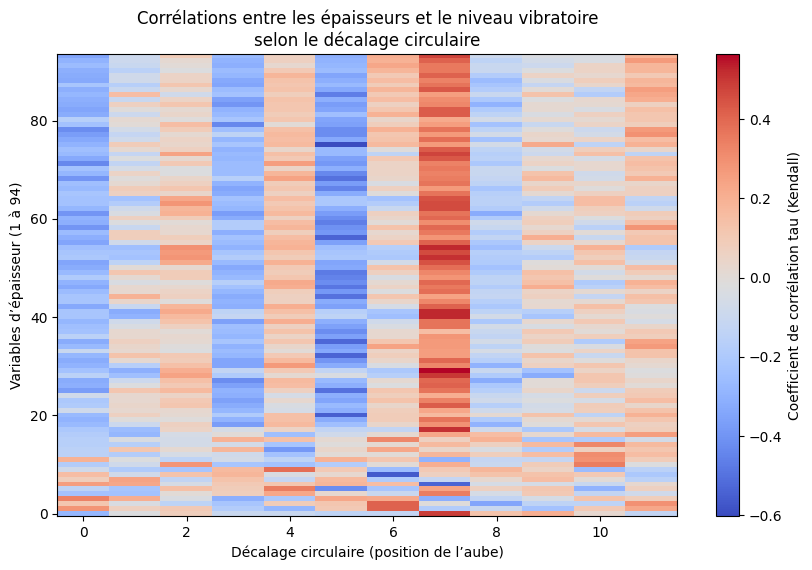

In [29]:
import numpy as np
import matplotlib.pyplot as plt

X1 = X1.apply(pd.to_numeric, errors='coerce')
vibrations['Niveau vibratoire 1FPP (mm)'] = pd.to_numeric(vibrations['Niveau vibratoire 1FPP (mm)'], errors='coerce')


#liste des décalages possibles (rotation circulaire des aubes)
decalages = range(12)

#on se limite aux 94 variables d'épaisseur
variables_epaisseur = X1.columns[:94]

#mtrice pour stocker les coefficients tau pour chaque variable et chaque décalage
coeffs_tau = []


for var in variables_epaisseur:
    epaisseur = X1[var].values
    tau_par_decalage = []
    
    #on calcule le tau de Kendall entre l'épaisseur et les vibrations pour chaque décalage circulaire
    for k in decalages:
        vibrations_decalees = np.roll(vibrations['Niveau vibratoire 1FPP (mm)'].values, k)
        tau, _ = kendall_tau(epaisseur, vibrations_decalees)
        tau_par_decalage.append(tau)
    
    coeffs_tau.append(tau_par_decalage)

#conversion en tableau numpy pour affichage
coeffs_tau = np.array(coeffs_tau)

# ---visualisation des corrélations ---
plt.figure(figsize=(10, 6))
plt.imshow(coeffs_tau, aspect='auto', cmap='coolwarm', origin='lower')
plt.colorbar(label="Coefficient de corrélation tau (Kendall)")
plt.xlabel("Décalage circulaire (position de l’aube)")
plt.ylabel("Variables d’épaisseur (1 à 94)")
plt.title("Corrélations entre les épaisseurs et le niveau vibratoire\nselon le décalage circulaire")
plt.show()


Le graphique montre une forte corrélation (en rouge) pour le décalage circulaire n°7, concentrée autour des variables d’épaisseur 60 à 80.
Cela signifie que l’aube n°8 est la plus probablement défaillante, et que le défaut se situe dans la zone médiane à externe de la pale, où les épaisseurs varient le plus.